# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:20<00:00, 1349.33it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:

# similarly you can preprocess the titles also
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())# similarly you can preprocess the titles also

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 30992.29it/s]


In [19]:
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_title'], axis=1, inplace=True)

In [20]:
project_data['essay'] = preprocessed_essays
project_data['project_title'] = preprocessed_project_title

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'project_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [22]:
# Combining two tables 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [23]:
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'project_title',
       'price', 'quantity'],
      dtype='object')

In [24]:
# Taking a sample of 30000 points from project data for analysis

X = project_data[0:30000]
y= X['project_is_approved'].values
X.drop(['project_is_approved'], axis=1, inplace=True)
X.drop(['project_title'], axis=1, inplace=True)
X['project_title'] = preprocessed_project_title[:30000]
print(X.shape ,y.shape)



(30000, 19) (30000,)


### 2. Creating Data Matrix

### 2.1 converting the text to vectors

#### BOW (Essay + Title)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X['essay'].values) 

# we use the fitted CountVectorizer to convert the text to vector
X_essay_bow = vectorizer.transform(X['essay'].values)


print("After vectorizations")
print(X_essay_bow.shape, y.shape)



After vectorizations
(30000, 5000) (30000,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(X['project_title'].values) 

# we use the fitted CountVectorizer to convert the text to vector
X_title_bow = vectorizer.transform(X['project_title'].values)


print("After vectorizations")
print(X_title_bow.shape, y.shape)


After vectorizations
(30000, 2640) (30000,)


#### Vectoizing categorical features

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_state_ohe = vectorizer.transform(X['school_state'].values)


print("After vectorizations")
print(X_state_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(30000, 51) (30000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(X['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_categories_ohe = vectorizer.transform(X['clean_categories'].values)

print("After vectorizations")
print(X_categories_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(30000, 9) (30000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_subcategories_ohe = vectorizer.transform(X['clean_subcategories'].values)


print("After vectorizations")
print(X_subcategories_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(30000, 30) (30000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [30]:
#Feature Encoding for teacher_prefix
#We have nan values of teacher prefix which is causing issues with count vectorizer
#Replaced the nan values with Mrs.

X['teacher_prefix'] =  X['teacher_prefix'].fillna('Mrs.')

print(list(X['teacher_prefix'].value_counts()))

vectorizer = CountVectorizer()
vectorizer.fit(X['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_prefix_ohe = vectorizer.transform(X['teacher_prefix'].values)


print("After vectorizations")
print(X_prefix_ohe.shape, y.shape)

print(vectorizer.get_feature_names())
print("="*100)

[15683, 10779, 2895, 643]
After vectorizations
(30000, 4) (30000,)
['mr', 'mrs', 'ms', 'teacher']


In [31]:
#Grade category is like this 'Grades 3-5'
#Converting it to'Grades_3_5 for one hot encoding
#If not converted it throws error

grade_category_processed = []
grade_category=[]
grade_category = X['project_grade_category']
for grade in grade_category:
    grade=grade.replace(" ","_")
    grade=grade.replace("-","_")
    grade_category_processed.append(grade)
print(len(grade_category_processed),project_data['project_grade_category'].shape)
print(grade_category_processed[5],project_data['project_grade_category'].values[5])



X.drop(['project_grade_category'], axis=1, inplace=True)
X['project_grade_category'] = grade_category_processed


30000 (109248,)
Grades_3_5 Grades 3-5


In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_grade_ohe = vectorizer.transform(X['project_grade_category'].values)


print("After vectorizations")
print(X_grade_ohe.shape, y.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(30000, 4) (30000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### Normalizing Numerical Features

In [33]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['price'].values.reshape(-1,1))

X_price_norm = normalizer.transform(X['price'].values.reshape(-1,1))


print("After vectorizations")
print(X_price_norm.shape, y.shape)

print("="*100)

After vectorizations
(30000, 1) (30000,)


In [34]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['quantity'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['quantity'].values.reshape(-1,1))

X_quantity_norm = normalizer.transform(X['quantity'].values.reshape(-1,1))


print("After vectorizations")
print(X_quantity_norm.shape, y.shape)

print("="*100)

After vectorizations
(30000, 1) (30000,)


In [35]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X['prev_posted'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_prev_posted_norm = normalizer.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print("After vectorizations")
print(X_prev_posted_norm.shape, y.shape)

print("="*100)

After vectorizations
(30000, 1) (30000,)


In [36]:
#Testing the shape of all the encoded vectors

print(X_state_ohe.shape)
print(X_categories_ohe.shape)
print(X_subcategories_ohe.shape)
print(X_prefix_ohe.shape)
print(X_grade_ohe.shape)

print(X_price_norm.shape)
print(X_quantity_norm.shape)
print(X_prev_posted_norm.shape)


print(X_essay_bow.shape)
print(X_title_bow.shape)


(30000, 51)
(30000, 9)
(30000, 30)
(30000, 4)
(30000, 4)
(30000, 1)
(30000, 1)
(30000, 1)
(30000, 5000)
(30000, 2640)


## 1.5 Preparing data for models

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [ ]:
# Done above

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# Done above

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [37]:
# Train data


from scipy.sparse import hstack
X_bow = hstack((X_state_ohe , X_categories_ohe, X_subcategories_ohe , X_prefix_ohe, X_grade_ohe, \
                    X_price_norm, X_quantity_norm , X_prev_posted_norm ,\
                    X_essay_bow , X_title_bow)).tocsr()



print(X_bow.shape)


(30000, 7741)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [38]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000)

svd.fit(X_bow)

X_bow_new = svd.transform(X_bow)

In [39]:

X_bow_data = X_bow_new[:30000] 
print(X_bow_data.shape)

(30000, 5000)


<h2>2.5 Apply Kmeans</h2>

In [87]:
from sklearn.cluster import KMeans

inertia_list = { }


for i in range(1,7):

    kmeans = KMeans(n_jobs=-1, random_state=0 , init='k-means++' , n_clusters = i)
    
    kmeans.fit(X_bow_data)
    
    inertia_list[i] = kmeans.inertia_
    
    
print(inertia_list)



{1: 15787530.734033097, 2: 14919895.765836673, 3: 14684897.334884183, 4: 14491782.551654356, 5: 14368093.218165465, 6: 14267402.514976708}


In [96]:
dict_kmeans={'n_clusters':[1,2,3,4,5,6] , \
             'inertia':[15787530.734033097 , 14919895.765836673 , 14684897.334884183, 14491782.551654356, 14368093.218165465 , \
                       
                       14267402.514976708]}

print(min(dict_kmeans['inertia']))




14267402.514976708


No handles with labels found to put in legend.


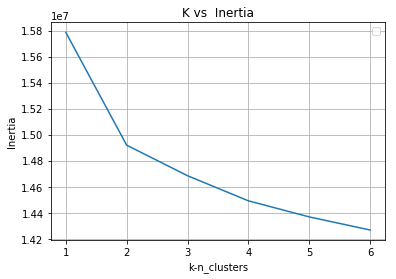

In [97]:
plt.plot(dict_kmeans['n_clusters'], dict_kmeans['inertia'])
plt.legend()
plt.xlabel("k-n_clusters")
plt.ylabel("Inertia")
plt.title("K vs  Inertia")
plt.grid()
plt.show()

In [98]:
kmeans = KMeans(n_jobs=-1, random_state=0 , init='k-means++' , n_clusters = 6)
kmeans.fit(X_bow_data)
clusters_kmeans = kmeans.transform(X_bow_data)



In [101]:
y_predicted_kmeans = kmeans.predict(X_bow_data[:80])

# We have 6 cluster so labels of clusters are 0-6
# storing the index in each key(key+1 represents hyperparameter k)
cluster_labels = {0:[] ,1:[] ,2:[] ,3:[] , 4:[] , 5:[] }

for index,label in enumerate(y_predicted_kmeans):
    cluster_labels[label].append(index)
    
print(cluster_labels)



{0: [13, 14, 18, 19, 25, 30, 39, 58, 69, 75, 77, 78], 1: [1, 8, 12, 20, 23, 36, 55, 57, 65], 2: [3, 4, 6, 9, 16, 24, 26, 29, 32, 33, 40, 41, 46, 59, 62, 67, 68, 71], 3: [2, 11, 17, 31, 34, 38, 43, 49, 54, 63, 66, 74], 4: [0, 5, 7, 10, 15, 22, 27, 35, 44, 45, 48, 50, 51, 53, 60, 61, 70, 79], 5: [21, 28, 37, 42, 47, 52, 56, 64, 72, 73, 76]}


In [103]:
# Manually observing few points in each cluster

print(y[cluster_labels[0]])
print(y[cluster_labels[1]])
print(y[cluster_labels[2]])
print(y[cluster_labels[3]])
print(y[cluster_labels[4]])
print(y[cluster_labels[5]])

[1 0 1 1 0 1 1 1 1 1 0 1]
[1 1 0 1 1 1 0 1 0]
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0]
[1 0 1 1 1 1 0 1 1 0 1]


##### Conclusion

1) we got 6 as the best K 

2) All the clusters are a mix of 0 and 1 


In [105]:
y_predicted_kmeans = kmeans.predict(X_bow_data)

# We have 6 cluster so labels of clusters are 0-5
# storing the index in each key
# key 0 represents class label = 0 and so on....

cluster_labels = {0:[] ,1:[] ,2:[] ,3:[] , 4:[] , 5:[] }

for index,label in enumerate(y_predicted_kmeans):
    cluster_labels[label].append(index)




In [45]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()




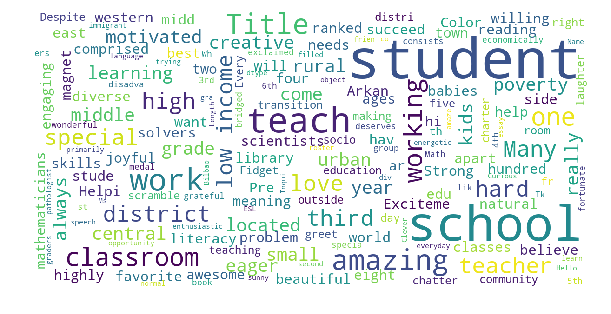

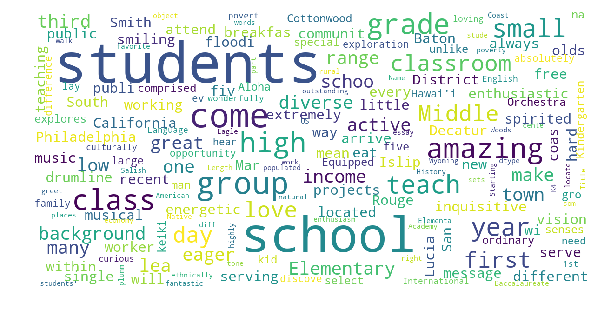

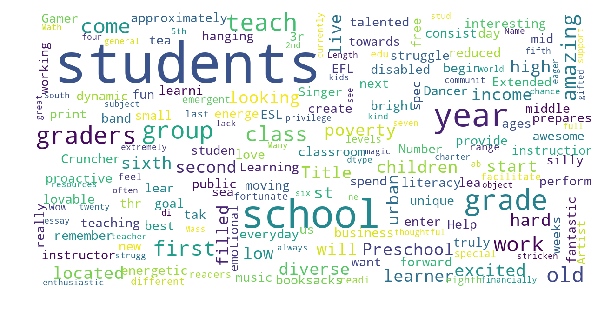

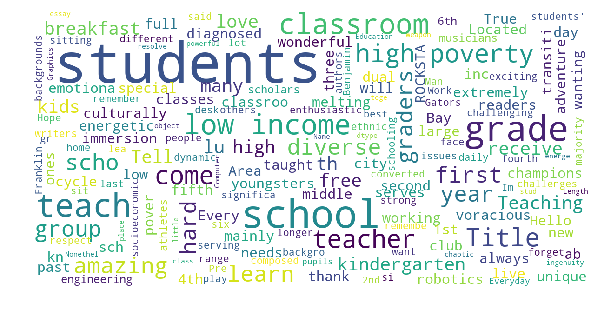

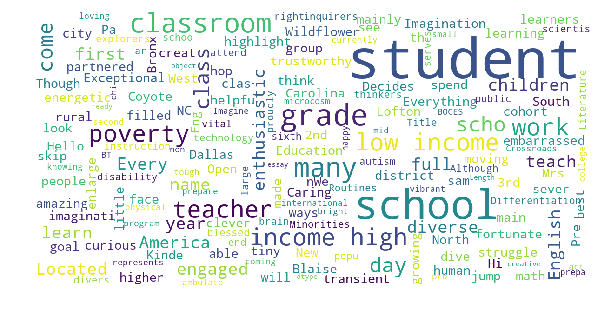

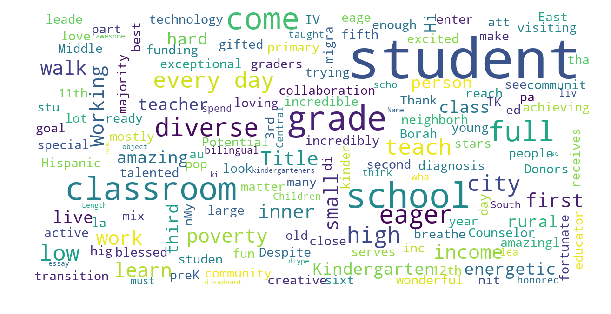

In [121]:
#scroll the box for all the wordclouds

# as we have taken 30000 points only
X_test = X[0:30000]
# Generating word cloud for all the essay in each cluster

show_wordcloud(X_test['essay'][cluster_labels[0]])
show_wordcloud(X_test['essay'][cluster_labels[1]])
show_wordcloud(X_test['essay'][cluster_labels[2]])
show_wordcloud(X_test['essay'][cluster_labels[3]])
show_wordcloud(X_test['essay'][cluster_labels[4]])
show_wordcloud(X_test['essay'][cluster_labels[5]])

##### conclusions:

1) Some of the most frequent words in cluster 1 are (student , teach , amazing ,Title, working)...

2) Some of the most frequent words in cluster 2 are (student , school , high ,class, group)...

3) Some of the most frequent words in cluster 3 are (students , graders , year ,school, amazing)...

4) Some of the most frequent words in cluster 4 are (student , classroom , poverty ,graders, teacher)...

5) Some of the most frequent words in cluster 5 are (student , school , grade ,income, high)...

6) Some of the most frequent words in cluster 6 are (student , grade , eager ,full, diverse)...


<h2>2.6 Apply AgglomerativeClustering</h2>

In [69]:

X_bow_data = X_bow_new[:10000]
print(X_bow_data.shape)

(10000, 5000)


In [70]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2)

clusters_agglomerative = clustering.fit_predict(X_bow_data)


In [71]:
# We have 2 cluster so labels of clusters are 0-1
# storing the index in each key
# key 0 represents class label = 0 and so on....

cluster_labels = {0:[] ,1:[] }

for index,label in enumerate(clusters_agglomerative[:50]):
    cluster_labels[label].append(index)



In [72]:
# Manually observing few points in each cluster

print(y[cluster_labels[0]])
print(y[cluster_labels[1]])


[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1]
[0 1 1 1 1 1 1 1 1 1 1 1]


##### In the sample of 50 points we can see that cluster  which has label = 0 are mostly  the +ve points(y=1)

##### we cannot see clear diiference between clusters as both clusters here have mix of +ve and -ve points

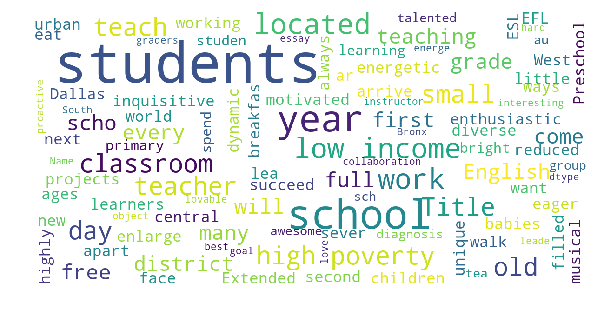

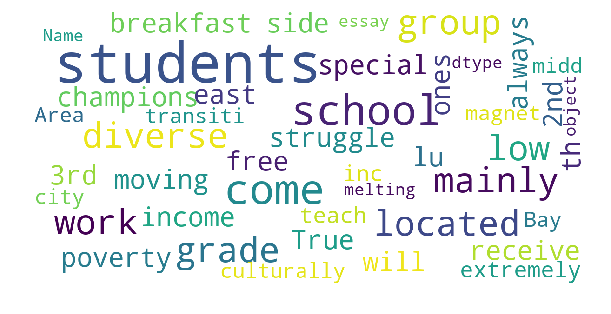

In [73]:
# as we have taken 30000 points only
X_test = X[0:10000]
# Generating word cloud for all the essay in each cluster

show_wordcloud(X_test['essay'][cluster_labels[0]])
show_wordcloud(X_test['essay'][cluster_labels[1]])

##### Conclusions:


1) Some of the most frequent words in cluster 1 are (students , year , school ,income, poverty)...

2) Some of the most frequent words in cluster 2 are (students , school , located ,mainly, diverse)...

##### for n_clusters  = 5

In [74]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5)

clusters_agglomerative = clustering.fit_predict(X_bow_data)


In [77]:
# We have 2 cluster so labels of clusters are 0-1
# storing the index in each key
# key 0 represents class label = 0 and so on....

cluster_labels = {0:[] ,1:[] ,2:[] , 3:[], 4:[] }

for index,label in enumerate(clusters_agglomerative[0:50]):
    cluster_labels[label].append(index)



In [78]:
# Manually observing few points in each cluster

print(y[cluster_labels[0]])
print(y[cluster_labels[1]])
print(y[cluster_labels[2]])
print(y[cluster_labels[3]])
print(y[cluster_labels[4]])

[1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 1 1]
[0 1 0 1 1]
[]


##### In the sample of 50 points we can see that cluster  with label 4 is  not present

##### we cannot see clear diiference between clusters as both clusters here have mix of +ve and -ve points

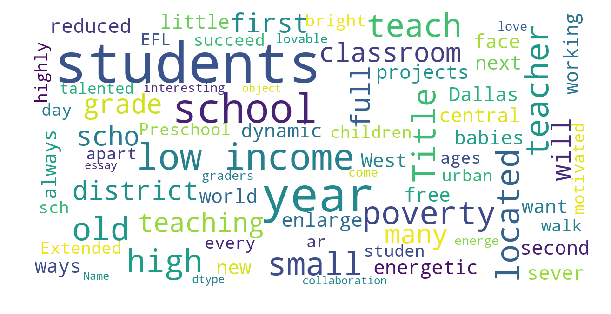

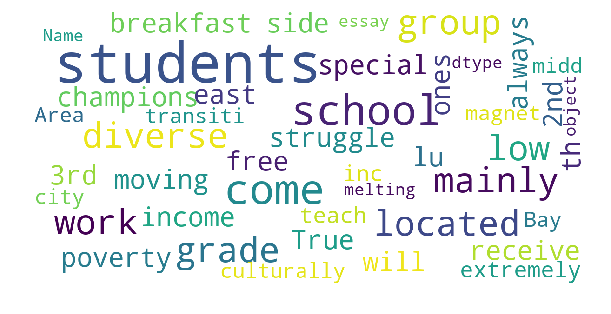

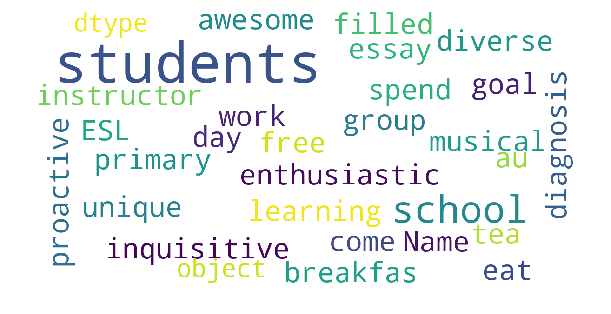

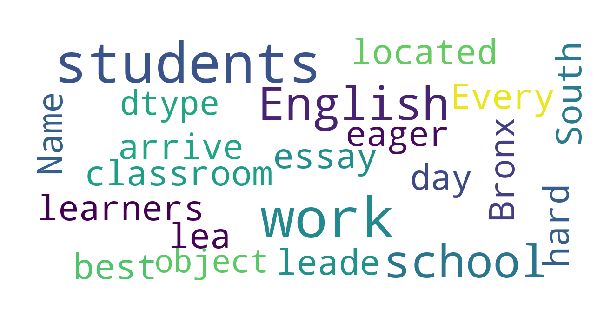

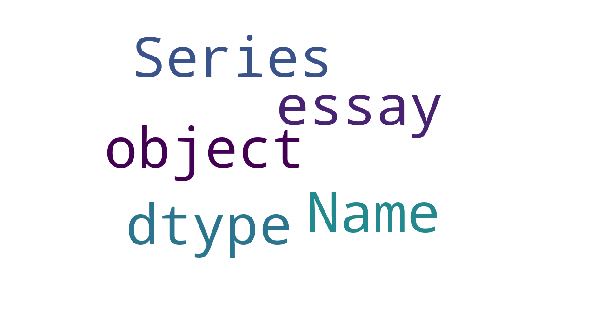

In [79]:
# as we have taken 30000 points only
X_test = X[0:10000]
# Generating word cloud for all the essay in each cluster

show_wordcloud(X_test['essay'][cluster_labels[0]])
show_wordcloud(X_test['essay'][cluster_labels[1]])
show_wordcloud(X_test['essay'][cluster_labels[2]])
show_wordcloud(X_test['essay'][cluster_labels[3]])
show_wordcloud(X_test['essay'][cluster_labels[4]])

##### conclusions:

1) Some of the most frequent words in cluster 1 are (student , income , school ,title, year)...

2) Some of the most frequent words in cluster 2 are (students , come , mainly ,located, diverse)...

3) Some of the most frequent words in cluster 3 are (students , enthusiastic , proactive ,diagnosis, inquisitive)...

4) Some of the most frequent words in cluster 4 are (students , english , learners ,school, classroom)...

5) Some of the most frequent words in cluster 5 are (series , essay , object ,income, high)...

6) Some of the most frequent words in cluster 6 are (student , grade , name )...


<h2>2.7 Apply DBSCAN</h2>

In [41]:

X_bow_data = X_bow_new[:30000]
print(X_bow_data.shape)

(30000, 5000)


In [46]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=10000)
neigh.fit(X_bow_data)
neighbours = neigh.kneighbors(X_bow_data)



In [47]:
# Getting 10000 point distance from every point

k_distance_list = []

for i in range(0,30000):
    k_distance_list.append(neighbours[0][i][9999])
    

    

In [48]:

# sorting the k-distances
k_distance_sorted = np.sort(k_distance_list)
# sorting the index for point index
k_distance_sorted_index = np.argsort(k_distance_list)





29964


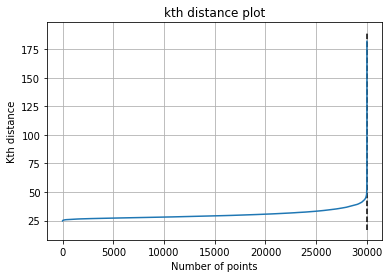

In [49]:
# knee locator
# https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python
from kneed import KneeLocator
kn = KneeLocator( np.arange(1,30001) , k_distance_sorted ,curve='convex', direction='increasing')
print(kn.knee)
elbow_distance = k_distance_sorted[kn.knee-1]


plt.plot( k_distance_sorted)
plt.title("kth distance plot")
plt.ylabel("Kth distance")
plt.xlabel("Number of points")
plt.grid()
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


In [50]:
elbow_distance = np.floor(elbow_distance)
print(elbow_distance)

47.0


In [51]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=elbow_distance, min_samples=10000, n_jobs= -1)
labels_dbscan = clustering.fit_predict(X_bow_data)

In [55]:
print(np.unique(labels_dbscan))

[-1  0]


#### we can see that min_points = 10000 and epsilon = 47  gave all the points into one cluster and classified remanining points as 
#### noise( We have only two class labels and -1 is used to represent noise)

In [42]:
# considering only 10000 points due to hardware restrictions

X_bow_data = X_bow_new[:10000]
print(X_bow_data.shape)

(10000, 5000)


In [91]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

dbscan_scores = []
epsilon_values = [30,33,35,40]

for i in epsilon_values:
    clf = DBSCAN(eps=i , min_samples=5 , n_jobs=-1)
    clf.fit(X_bow_data)
    dbscan_scores.append(silhouette_score(X_bow_data , clf.labels_ , metric = "euclidean"))

    



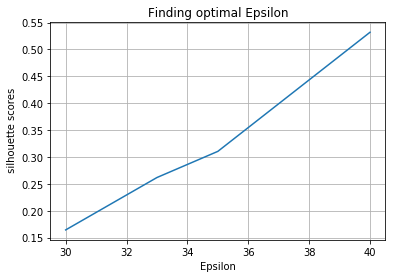

In [92]:
plt.plot(epsilon_values , dbscan_scores )
plt.title("Finding optimal Epsilon")
plt.ylabel(" silhouette scores")
plt.xlabel("Epsilon")
plt.grid()
plt.show()


In [ ]:
#clf = DBSCAN(eps=i , min_samples=5 , n_jobs=-1)
#clf.fit(X_bow_data)

In [93]:
np.unique(clf.labels_)

array([-1,  0], dtype=int64)

###### We get epsilon = 40 which gives best silhouette score

In [43]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=40 , min_samples=5 , n_jobs=-1)
clf.fit(X_bow_data)

DBSCAN(algorithm='auto', eps=40, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [44]:
np.unique(clf.labels_)

array([-1,  0], dtype=int64)

In [45]:
index_list = {0:[] , -1:[]}

for index,label in enumerate(clf.labels_):
    index_list[label].append(index)


In [46]:

len(index_list[-1])
print(index_list[-1])

[7746]


##### When we set min_points=40 we have only one noise(index=7746) point and all the remaining points are clustered into one big cluster

##### For Epsilon = 47(Kneel point)

In [47]:
from sklearn.cluster import DBSCAN

clf_1 = DBSCAN(eps=47 , min_samples=5 , n_jobs=-1)
clf_1.fit(X_bow_data)

DBSCAN(algorithm='auto', eps=47, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [48]:
np.unique(clf_1.labels_)

array([-1,  0], dtype=int64)

In [51]:
index_list = {0:[] , -1:[]}

for index,label in enumerate(clf_1.labels_):
    index_list[label].append(index)


In [54]:

len(index_list[-1])
print(index_list[-1])

[7746]


#### We get the same result with epsilon = 47 and epsilon = 40

##### Fetching the noise point

In [56]:
print(project_data.iloc[7746])

Unnamed: 0                                                                                 170569
id                                                                                        p092305
teacher_id                                                       70288fe0ef5e429d8ec68fb22ddfe99b
teacher_prefix                                                                                Mr.
school_state                                                                                   TX
project_submitted_datetime                                                    2017-03-07 11:32:24
project_grade_category                                                                 Grades 6-8
project_essay_1                                 Visual and hands-on learners.  Visual and hand...
project_essay_2                                 Visual and hands-on learners.Visual and hands-...
project_essay_3                                                                               NaN
project_essay_4     

In [62]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()




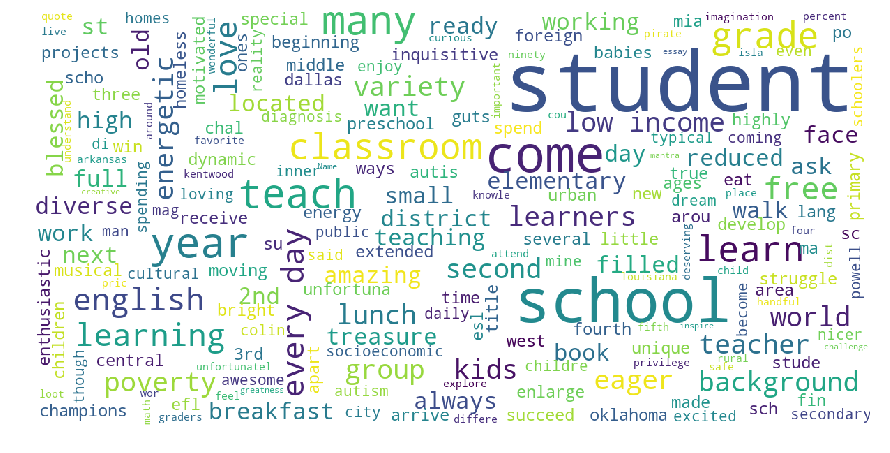

In [63]:
X_test = X[0:10000]

show_wordcloud(X_test['essay'][index_list[0]])

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [66]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x= PrettyTable()

x.field_names = ["Vectorizer","Clustering","Hyper Parameter","No of Clusters obtained"]
x.add_row(["BagOfWords","K-Means","cluster size =6",6])
x.add_row(["BagOfWords","Agglomerative","cluster size = [2,5]","[2,5]"])
x.add_row(["BagOfWords","DBSCAN","Epsilon = 47",1])


print(x)


+------------+---------------+----------------------+-------------------------+
| Vectorizer |   Clustering  |   Hyper Parameter    | No of Clusters obtained |
+------------+---------------+----------------------+-------------------------+
| BagOfWords |    K-Means    |   cluster size =6    |            6            |
| BagOfWords | Agglomerative | cluster size = [2,5] |          [2,5]          |
| BagOfWords |     DBSCAN    |     Epsilon = 47     |            1            |
+------------+---------------+----------------------+-------------------------+


##### Conclusions:

1) Applied K-means , Agglomerative and DBSCAN clustering techniques on BagOfWords Feature set

2) clusters obtained from K-Means and Agglomerative contains a mix of +ve and -ve points

3) Agglomerative clustering takes considerable amount of time to run

4) DBSCAN gave only one cluster with some noise points

5) Considered less points for DBSCAN which can be the reason for the above poor quality result

6) Epsilon values > kneelpoint(47 in our case) tend to give very less noise points

7) Analysis can be done with higher number of datapoints (Restricted to less data points due to hardware limitations)
